In [1]:
import tensorflow as tf
print("Is GPU available?", tf.config.list_physical_devices('GPU'))


E0000 00:00:1734769559.482921    5985 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734769559.557256    5985 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Is GPU available? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### define directories

In [16]:

# Paths
dataset_path = "../data/selected_categories/EuroSAT"
test_data_path = "../data/test_data"
preprocessed_dir = "../data/preprocessed_data"
categories = ["Forest", "Residential", "Highway", "AnnualCrop", "HerbaceousVegetation", "Industrial"]
image_size = 128  # Resize to 128x128


### preprocess in batches so as to not run into issues

In [9]:
import os
import cv2
import numpy as np


os.makedirs(preprocessed_dir, exist_ok=True)

# Preprocessing
for category in categories:
    category_path = os.path.join(dataset_path, category)
    output_path = os.path.join(output_dir, f"{category}.npy")
    
    print(f"Processing category: {category}")
    images = []
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        try:
            img = cv2.imread(file_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0  # Normalize to [0, 1]
            images.append(img)
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
    
    # Save preprocessed images to disk
    np.save(output_path, np.array(images))
    print(f"Saved preprocessed images for {category} to {output_path}")


Processing category: Forest
Saved preprocessed images for Forest to ../data/preprocessed_data/Forest.npy
Processing category: Residential
Saved preprocessed images for Residential to ../data/preprocessed_data/Residential.npy
Processing category: Highway
Saved preprocessed images for Highway to ../data/preprocessed_data/Highway.npy
Processing category: AnnualCrop
Saved preprocessed images for AnnualCrop to ../data/preprocessed_data/AnnualCrop.npy
Processing category: HerbaceousVegetation
Saved preprocessed images for HerbaceousVegetation to ../data/preprocessed_data/HerbaceousVegetation.npy
Processing category: Industrial
Saved preprocessed images for Industrial to ../data/preprocessed_data/Industrial.npy


In [19]:
data = np.load("../data/preprocessed_data/AnnualCrop.npy")
print(data.shape)  # Output: (N, 128, 128, 3)
print(data[0])  # First image as a NumPy array with pixel values in [0, 1]


(3000, 128, 128, 3)
[[[0.44313725 0.38039216 0.38431373]
  [0.44313725 0.38039216 0.38431373]
  [0.44313725 0.38039216 0.38431373]
  ...
  [0.56470588 0.61960784 0.85490196]
  [0.57254902 0.63137255 0.87058824]
  [0.57647059 0.63529412 0.87843137]]

 [[0.44313725 0.38039216 0.38431373]
  [0.44313725 0.38039216 0.38431373]
  [0.44313725 0.38039216 0.38431373]
  ...
  [0.56862745 0.61960784 0.85490196]
  [0.57647059 0.63137255 0.87058824]
  [0.58039216 0.63921569 0.87843137]]

 [[0.44313725 0.38039216 0.38431373]
  [0.44313725 0.38039216 0.38431373]
  [0.43921569 0.37647059 0.38039216]
  ...
  [0.57254902 0.62352941 0.85098039]
  [0.58039216 0.63529412 0.86666667]
  [0.58431373 0.64313725 0.8745098 ]]

 ...

 [[0.44313725 0.38823529 0.39215686]
  [0.44313725 0.38823529 0.39215686]
  [0.44313725 0.38823529 0.39215686]
  ...
  [0.48627451 0.44705882 0.49411765]
  [0.48627451 0.44705882 0.49411765]
  [0.49019608 0.45098039 0.49803922]]

 [[0.44705882 0.39215686 0.39607843]
  [0.44705882 0.3

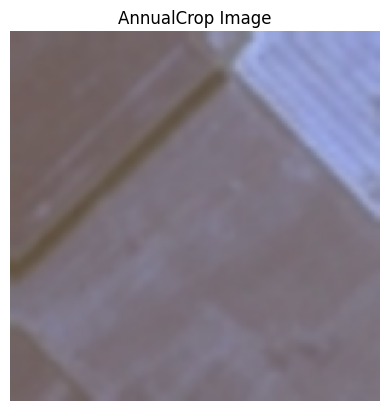

In [20]:
#not as pixel but it seeing it as image

import matplotlib.pyplot as plt

# Display the first image
plt.imshow(data[0])  # Show the first image
plt.title("AnnualCrop Image")
plt.axis("off")
plt.show()


### Load Preprocessed Data

### Combine all .npy files into a single dataset and create train/test splits.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import os



# Batch loading function
def batch_split_and_save(preprocessed_dir, categories, test_size=0.2, val_size=0.2):
    for category in categories:
        file_path = os.path.join(preprocessed_dir, f"{category}.npy")
        print(f"Processing {category}")
        
        # Load the category data
        images = np.load(file_path)
        labels = np.full(len(images), categories.index(category))
        
        # Split into Train+Validation and Test
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            images, labels, test_size=test_size, random_state=42
        )
        
        # Split Train+Validation into Training and Validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, test_size=val_size, random_state=42
        )
        
        # Save splits for this category
        np.save(os.path.join(preprocessed_dir, f"{category}_train.npy"), X_train)
        np.save(os.path.join(preprocessed_dir, f"{category}_val.npy"), X_val)
        np.save(os.path.join(preprocessed_dir, f"{category}_test.npy"), X_test)
        np.save(os.path.join(preprocessed_dir, f"{category}_train_labels.npy"), y_train)
        np.save(os.path.join(preprocessed_dir, f"{category}_val_labels.npy"), y_val)
        np.save(os.path.join(preprocessed_dir, f"{category}_test_labels.npy"), y_test)
        print(f"Saved splits for {category}")

print("preprocessed_dir", preprocessed_dir)
batch_split_and_save(preprocessed_dir, categories)


preprocessed_dir ../data/preprocessed_data
Processing Forest
Saved splits for Forest
Processing Residential
Saved splits for Residential
Processing Highway
Saved splits for Highway
Processing AnnualCrop
Saved splits for AnnualCrop
Processing HerbaceousVegetation
Saved splits for HerbaceousVegetation
Processing Industrial
Saved splits for Industrial


In [11]:
### check the size of the train, val and test for one Category

import numpy as np
import os

print(np.load(os.path.join(preprocessed_dir, "AnnualCrop_train.npy")).shape)
print(np.load(os.path.join(preprocessed_dir, "AnnualCrop_val.npy")).shape)
print(np.load(os.path.join(preprocessed_dir, "AnnualCrop_test.npy")).shape)


(1920, 128, 128, 3)
(480, 128, 128, 3)
(600, 128, 128, 3)


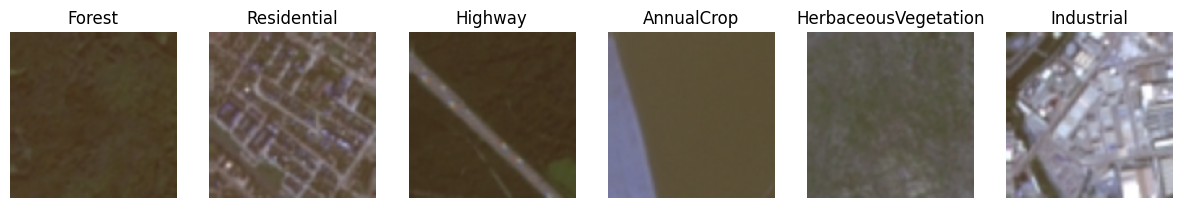

In [12]:
#display sample of one image per category

import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Function to visualize one random image from each category
def display_one_per_category(preprocessed_dir, categories):
    plt.figure(figsize=(15, 5))
    for i, category in enumerate(categories):
        # Load data for the category
        category_images = np.load(os.path.join(preprocessed_dir, f"{category}_train.npy"))
        
        # Randomly pick an image
        random_idx = random.randint(0, len(category_images) - 1)
        image = category_images[random_idx]
        
        # Display the image
        plt.subplot(1, len(categories), i + 1)
        plt.imshow(image)
        plt.title(category)
        plt.axis("off")
    plt.show()

# Visualize one random image from each category
display_one_per_category(preprocessed_dir, categories)


In [17]:
import os
import numpy as np


# Initialize total image count
total_images = 0

# Ensure the folder exists
if os.path.exists(preprocessed_dir):
    for file in os.listdir(preprocessed_dir):
        if file.endswith(".npy"):  # Only process .npy files
            file_path = os.path.join(preprocessed_dir, file)
            # Load the numpy file and add the number of images
            try:
                data = np.load(file_path)  # Corrected to load the file path
                total_images += data.shape[0]  # Add the number of images
            except Exception as e:
                print(f"Error processing file {file}: {e}")
    print(f"Total number of images in '{preprocessed_dir}': {total_images}")
else:
    print(f"Directory '{preprocessed_dir}' does not exist. Please check the path.")

# Memory usage calculation
image_size = (128, 128, 3)  # Replace with your image dimensions
dtype = np.float32  # Replace with your data type

# Memory required in bytes
memory_bytes = total_images * np.prod(image_size) * np.dtype(dtype).itemsize
memory_gb = memory_bytes / (1024 ** 3)

print(f"Estimated memory usage: {memory_gb:.2f} GB")


Total number of images in '../data/preprocessed_data': 51000
Estimated memory usage: 9.34 GB


In [18]:
import psutil

# Get system memory details
memory = psutil.virtual_memory()

# Total memory in GB
total_memory_gb = memory.total / (1024 ** 3)

print(f"Total System Memory: {total_memory_gb:.2f} GB")


Total System Memory: 15.32 GB


In [ ]:
# Reshape labels for binary segmentation
y_train = np.expand_dims(y_train, axis=-1)  # Add the last channel dimension
y_val = np.expand_dims(y_val, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

# Expand each label to match the spatial dimensions of the image
y_train = np.broadcast_to(y_train, (y_train.shape[0], 128, 128, 1))
y_val = np.broadcast_to(y_val, (y_val.shape[0], 128, 128, 1))
y_test = np.broadcast_to(y_test, (y_test.shape[0], 128, 128, 1))

print("New y_train shape:", y_train.shape)  # Should be (10880, 128, 128, 1)
print("New y_val shape:", y_val.shape)  # Should be (2720, 128, 128, 1)
print("New y_test shape:", y_test.shape)  # Should be (3400, 128, 128, 1)


In [ ]:
print("X_train shape:", X_train.shape)  # Should be (batch_size, 128, 128, 3)
print("y_train shape:", y_train.shape)  # Should be (batch_size, 128, 128, 1)


In [ ]:
### Balancing Classes
### Why This Matters:

### If your dataset has significantly more images for some categories (e.g., Forest) than others (e.g., Highway), the model may become biased toward the dominant classes. Balancing ensures fair contributions from all categories.
### Code to Check Class Balance

import numpy as np
import os


# Check training set balance
class_counts = {}
for category in categories:
    labels = np.load(os.path.join(output_dir, f"{category}_train_labels.npy"))
    class_counts[category] = len(labels)

# Print class distribution
for category, count in class_counts.items():
    print(f"{category}: {count} images")


In [ ]:
import os
import tensorflow as tf

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Initialize TensorFlow
print("TensorFlow version:", tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
print("GPUs Available:", physical_devices)




## Step 1: Define the U-Net Architecture

In [ ]:
from tensorflow.keras import layers, Model

def unet(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    p1 = layers.Dropout(0.1)(p1)  # Add dropout after pooling

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    p2 = layers.Dropout(0.1)(p2)  # Add dropout after pooling

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    p3 = layers.Dropout(0.2)(p3)  # Increase dropout for deeper layers

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    p4 = layers.Dropout(0.2)(p4)  # Add dropout after pooling

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = layers.Dropout(0.3)(c5)  # Add dropout in the bottleneck

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [ ]:
import tensorflow as tf  # Ensure TensorFlow is imported
from tensorflow.keras.mixed_precision import set_global_policy

set_global_policy('mixed_float16')

In [ ]:
def iou_metric(y_true, y_pred):
    # Convert predictions to binary (0 or 1) for IoU calculation
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Threshold predictions at 0.5
    
    # Compute intersection and union
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true + y_pred - y_true * y_pred)
    
    # Avoid division by zero
    iou = intersection / (union + tf.keras.backend.epsilon())
    return iou



##  Step 2: Compile the Model

In [ ]:
model = unet(input_size=(64, 64, 3))  # Smaller input size for debugging


In [ ]:
# Compile model with IoU metric
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)  # Adam is compatible with mixed_float16

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', iou_metric])


## Step 3: Train the Model

using tf.data.Dataset for the following reasons:

    Scalability and Efficiency:
        It is optimized for TensorFlow's ecosystem, ensuring seamless and efficient data loading, preprocessing, and feeding into the model, especially when working with larger datasets or advanced architectures.

    Simpler Code:
        Handling shuffling, batching, and preprocessing manually can get cumbersome and error-prone. tf.data.Dataset simplifies the workflow with its high-level API.

    Future-Proofing:
        If your project grows to include larger datasets, distributed training, or dynamic preprocessing (e.g., image augmentation), tf.data.Dataset will already be set up to handle these seamlessly.

    GPU Utilization:
        It supports prefetching, which allows data preparation and model computation to overlap, making better use of your GPU resources.
    
    Why prefetch?

    The .prefetch(tf.data.AUTOTUNE) method ensures that the next batch is prepared while the current batch is being processed by the GPU, reducing idle time and speeding up training.

In [ ]:
# Reduce batch size
batch_size = 2

# Use only the first 1000 samples for debugging
X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]
X_val_subset = X_val[:500]
y_val_subset = y_val[:500]
X_test_subset = X_test[:500]
y_test_subset = y_test[:500]


try:
    # Define datasets for the subset
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train_subset, y_train_subset))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    val_dataset = tf.data.Dataset.from_tensor_slices((X_val_subset, y_val_subset))
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
except Exception as e:
    print("Error encountered:", e)


# Print shapes to confirm subset sizes
print(X_train_subset.shape, y_train_subset.shape)
print(X_val_subset.shape, y_val_subset.shape)
print(X_test_subset.shape, y_test_subset.shape)


### train the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
]

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2,
    callbacks=callbacks
)


## Step 4: Evaluate the Model

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss, Test Accuracy:", results)


## Step 5: Save the Model

In [ ]:
model.save("unet_greenery_detection.h5")


Visualize Results: After training, visualize the model's predictions on test images to assess performance:

In [ ]:
import matplotlib.pyplot as plt

sample_image = X_test[0]
sample_mask = y_test[0]
prediction = model.predict(sample_image[None, ...])[0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1); plt.title("Input"); plt.imshow(sample_image)
plt.subplot(1, 3, 2); plt.title("Ground Truth"); plt.imshow(sample_mask, cmap="gray")
plt.subplot(1, 3, 3); plt.title("Prediction"); plt.imshow(prediction, cmap="gray")
plt.show()
